<a href="https://colab.research.google.com/github/Mehul-Agrawal410/SOS_2023/blob/main/MNIST_digit_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import keras.layers as tfl

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [3]:
x_train[1].shape

(28, 28)

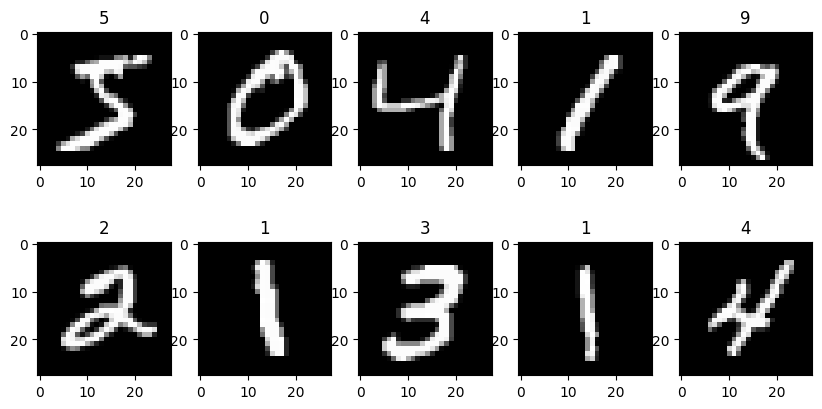

In [4]:
plt.figure(figsize = (10,5))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(y_train[i])
plt.show()

In [5]:
y_train = tf.one_hot(y_train, 10)
y_test = tf.one_hot(y_test, 10)
y_train.shape

TensorShape([60000, 10])

In [6]:
training_examples = x_train.shape[0]
test_examples = x_test.shape[0]
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [21]:
def generator():
  inputs = keras.Input(shape = (x_train[0].shape[0], x_train[0].shape[1],1))
  x = tfl.Conv2D(64, 3, 1, activation = 'relu')(inputs)
  x = tfl.MaxPool2D()(x)
  x = tfl.Conv2D(32, 3, 1, activation = 'relu')(x)
  x = tfl.MaxPool2D()(x)
  x = tfl.Flatten()(x)
  outputs = tfl.Dense(10, activation = 'softmax')(x)
  model = keras.Model(inputs, outputs, name = "MNIST_model")
  model.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=[keras.metrics.CategoricalAccuracy()],
)
  return model

model = generator()
model.summary()

Model: "MNIST_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 800)               

In [15]:
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_categorical_accuracy',
    mode='max',
    save_best_only=True
)

history = model.fit(x_train, y_train, batch_size=128, epochs=30, validation_split=0.2, callbacks=[model_checkpoint_callback])

Epoch 1/30
375/375 [==============================] - 5s 8ms/step - loss: 0.3434 - categorical_accuracy: 0.9015 - val_loss: 0.1209 - val_categorical_accuracy: 0.9634
Epoch 2/30
375/375 [==============================] - 2s 5ms/step - loss: 0.0928 - categorical_accuracy: 0.9718 - val_loss: 0.0780 - val_categorical_accuracy: 0.9785
Epoch 3/30
375/375 [==============================] - 2s 5ms/step - loss: 0.0675 - categorical_accuracy: 0.9790 - val_loss: 0.0619 - val_categorical_accuracy: 0.9820
Epoch 4/30
375/375 [==============================] - 2s 6ms/step - loss: 0.0541 - categorical_accuracy: 0.9838 - val_loss: 0.0543 - val_categorical_accuracy: 0.9837
Epoch 5/30
375/375 [==============================] - 2s 5ms/step - loss: 0.0465 - categorical_accuracy: 0.9855 - val_loss: 0.0521 - val_categorical_accuracy: 0.9858
Epoch 6/30
375/375 [==============================] - 2s 5ms/step - loss: 0.0401 - categorical_accuracy: 0.9875 - val_loss: 0.0498 - val_categorical_accuracy: 0.9858
Epoc

In [22]:
best_model = generator()
best_model.load_weights('/tmp/checkpoint')
test_scores = best_model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 1s - loss: 0.0358 - categorical_accuracy: 0.9894 - 848ms/epoch - 3ms/step
Test loss: 0.03580053150653839
Test accuracy: 0.9894000291824341


In [17]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


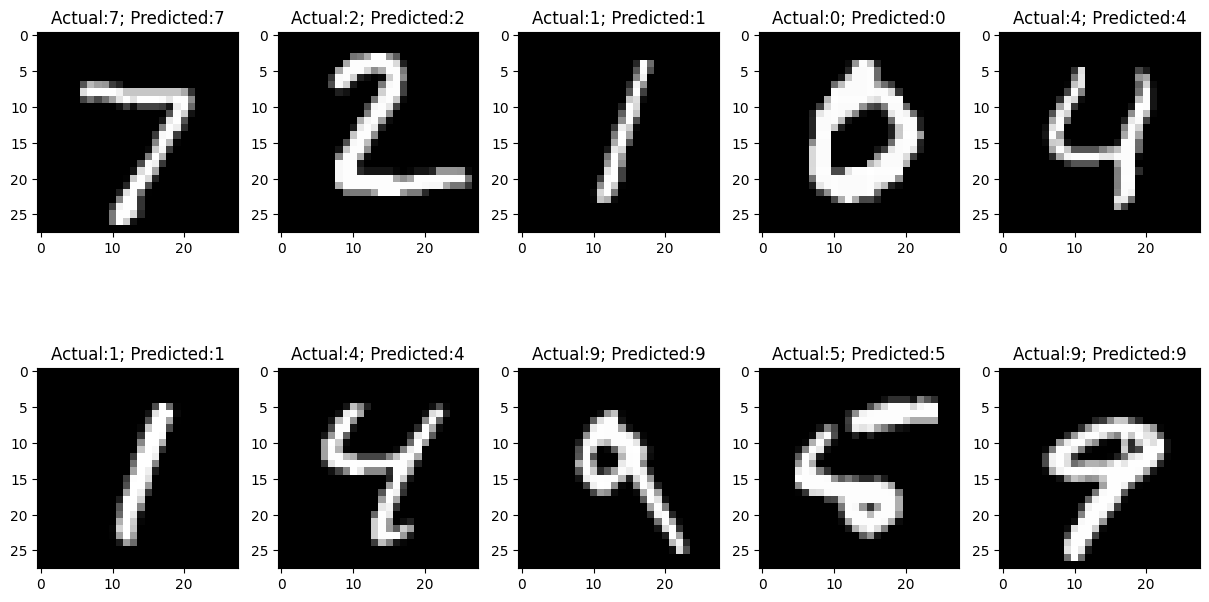

In [18]:
plt.figure(figsize = (15,8))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(x_test[i], cmap='gray')
  plt.title('Actual:' + str(tf.argmax(y_test[i],axis=-1).numpy()) + '; Predicted:' + str(tf.argmax(predictions[i],axis=-1).numpy()))
plt.show()